In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neighbors
import seaborn as sns
import models.data as models
import modelstwo.models as models_two

In [72]:
#weight_height_male = trimmed_male_data['stature', 'weightkg']
df = pd.read_csv('C:\School\BigData\Big_Data\male.csv', usecols=['stature', 'weightkg', 'chestcircumference'])
df.rename(columns={'weightkg':'Weight', 'stature':'Length', 'chestcircumference': 'Chest'}, inplace=True)
df['Weight'] = df['Weight'].multiply(0.1)
df['Length'] = df['Length'].multiply(0.1)
df['Chest'] = df['Chest'].multiply(0.1)

df.head()

,Chest,Length,Weight
0,107.4,177.6,81.5
1,102.1,170.2,72.6
2,112.0,173.5,92.9
3,111.4,165.5,79.4
4,104.8,191.4,94.6


In [73]:
test_one = models.Male_Shirt(65, 176)
print(test_one)
test_two = models_two.Male_Shirt_Chest(65, 187, 99)
print(test_two.size)

XLARGE


In [75]:
my_weight = 65
my_length = 176
my_chest = 98

#create a list of everyones weight & length
people = []
df['Size'] = ''
for row in df.itertuples():
    chestcircumference = row[1]
    height = row[2]
    weight = row[3]

    person = models_two.Male_Shirt_Chest(weight, height, chestcircumference)
    people.append(person)

#set everyones shirt size
everyones_size = []
for person in people:
    everyones_size.append(person.size)
df['Size'] = everyones_size

deltas = []
for person in people:
    height_diff = 0.0
    weight_diff = 0.0
    chest_diff = 0.0

    # if checks to make sure we always get positive values
    if person.height > my_length:
        height_diff = person.height - my_length
    else:
        height_diff = my_length - person.height

    if person.weight > my_weight:
        weight_diff = person.weight - my_length
    else:
        weight_diff = my_weight - person.weight

    if person.chestcircumference > my_chest:
        chest_diff = person.chestcircumference - my_chest
    else:
        chest_diff = my_chest - person.chestcircumference

    height_diff = height_diff * height_diff
    weight_diff = weight_diff * weight_diff
    chest_diff = chest_diff * chest_diff

    delta = height_diff + weight_diff + chest_diff
    deltas.append(delta)

df['deltapoint'] = deltas
df = df.sort_values(by='deltapoint')
df.head(10)

,Chest,Length,Weight,Size,deltapoint
2521,95.5,175.2,64.3,SMALL,7.38
2305,97.1,173.4,64.1,MEDIUM,8.38
2801,95.2,176.9,62.9,SMALL,13.06
4058,96.8,172.6,64.2,MEDIUM,13.64
1169,94.6,175.9,63.5,SMALL,13.82
2535,97.3,180.2,64.0,MEDIUM,19.13
1624,94.3,178.8,63.8,MEDIUM,22.97
2221,93.2,175.0,64.4,SMALL,24.40
548,93.2,174.9,63.5,SMALL,26.50
1982,96.6,171.1,63.3,MEDIUM,28.86


In [77]:
k = 10
neighbors = df.head(k)
neighbour_list = []

for row in neighbors.itertuples():
    neighbour = []
    size = row[4]
    distance = row[5]
    neighbour.append(size)
    neighbour.append(distance)
    neighbour_list.append(neighbour)

list_of_sizes = []
for size in neighbour_list:
    print(size[0])
    list_of_sizes.append(size[0])

most_common_size = max(set(list_of_sizes), key=list_of_sizes.count)
print('Recommended  Size: ' + most_common_size)

SMALL
MEDIUM
SMALL
MEDIUM
SMALL
MEDIUM
MEDIUM
SMALL
SMALL
MEDIUM
Recommended  Size: MEDIUM


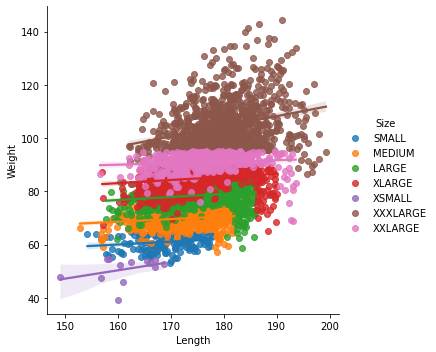

In [83]:
sns.lmplot(data=df, x="Length", y="Weight", hue="Size", legend='false')
#plt.legend(loc='lower right')